In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')


In [2]:
# import dataset
df = pd.read_csv('Salesdata.csv')
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,31-07-2015,5263,555,1,1,0,1
1,2,5,31-07-2015,6064,625,1,1,0,1
2,3,5,31-07-2015,8314,821,1,1,0,1
3,4,5,31-07-2015,13995,1498,1,1,0,1
4,5,5,31-07-2015,4822,559,1,1,0,1


# Sales Data EDA

In [3]:
df.shape

(1017209, 9)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [13]:
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [14]:
# checking for null values
df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [15]:
df.DayOfWeek.unique()

array([5, 4, 3, 2, 1, 7, 6], dtype=int64)

In [16]:
df.shape

(1017209, 9)

In [3]:
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y", errors='coerce')

In [18]:
df['StateHoliday'].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [4]:
#replacing string '0' with int 0
df['StateHoliday'].replace(0, '0', inplace=True)

In [5]:
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [21]:
df['month'].unique()

array([ 7,  6,  5,  4,  3,  2,  1, 12, 11, 10,  9,  8], dtype=int64)

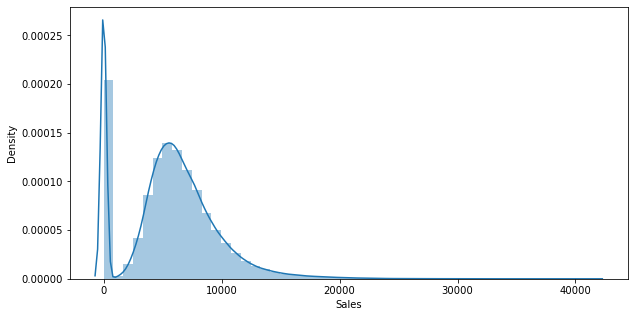

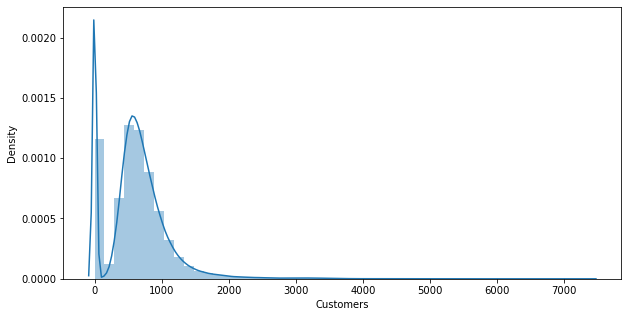

In [22]:
cols = ['Sales', 'Customers']
for i in cols:
    plt.figure(figsize=(10,5))
    sns.distplot(df[i])
    plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

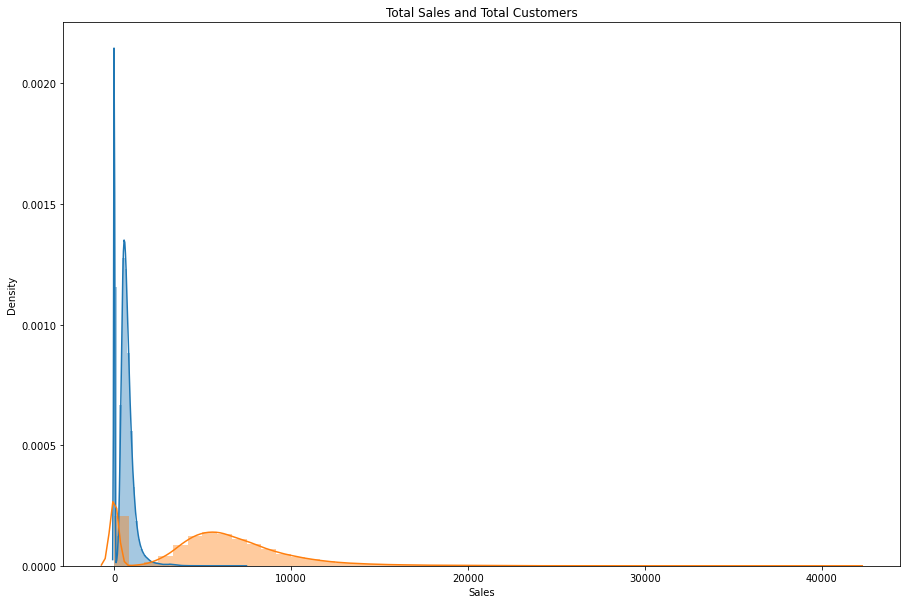

In [23]:
plt.figure(figsize=(15,10))
sns.distplot(df['Customers'])
sns.distplot(df['Sales'])
plt.title('Total Sales and Total Customers')
plt.show


In [7]:
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

In [18]:
# Range of dates

start_date = df.index.min()
end_date = df.index.max()
print(start_date, end_date)

2013-01-01 00:00:00 2015-07-31 00:00:00


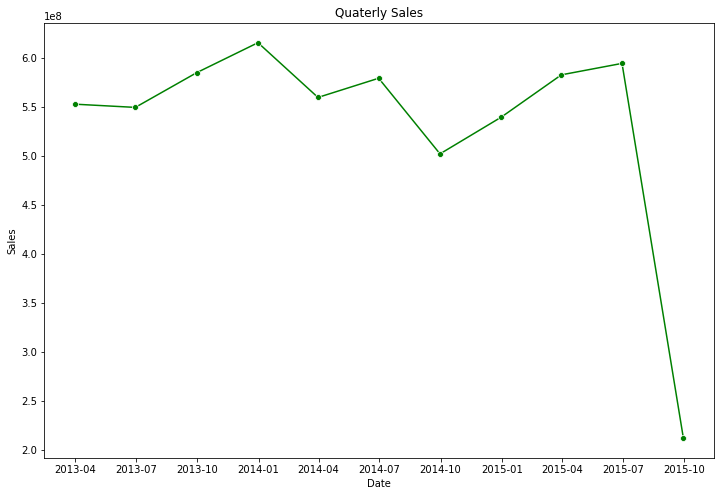

In [19]:
#Cheking slaes as per the Date in quaterly intervals

quarterly_sales = df['Sales'].resample('Q').sum()

plt.figure(figsize=(12,8))
sns.lineplot(data=quarterly_sales, x=quarterly_sales.index, y =quarterly_sales.values, marker='o', color = 'green')
plt.title('Quaterly Sales')
plt.ylabel('Sales')
# plt.savefig('Quaterly Sales')
plt.show()

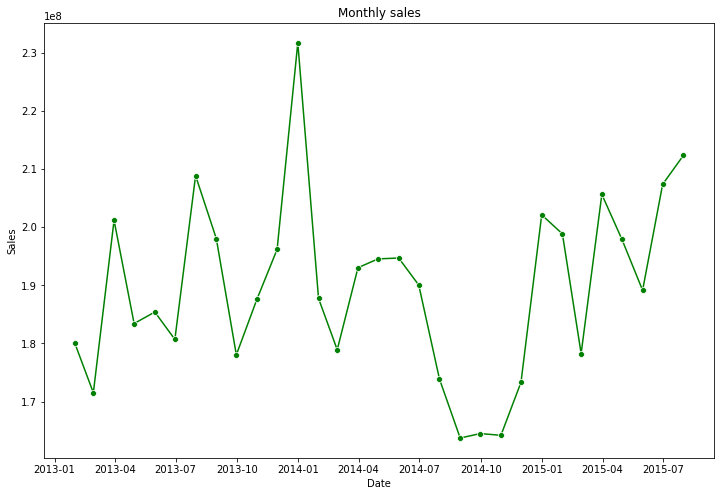

In [20]:
#Cheking slaes as per the Date in Monthly intervals
monthly_sales = df['Sales'].resample('M').sum()
plt.figure(figsize=(12,8))
sns.lineplot(data=monthly_sales, x=monthly_sales.index, y= monthly_sales.values, marker='o', color = 'green')

plt.title('Monthly sales')
plt.ylabel('Sales')
# plt.savefig('Monthly sales')
plt.show()

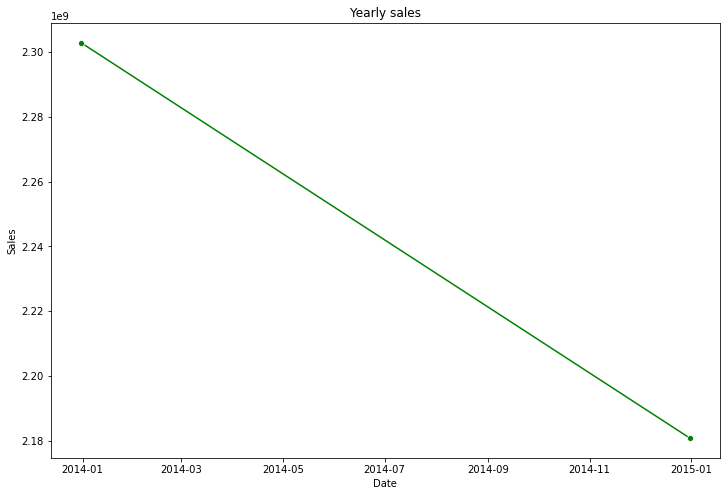

In [21]:
filtered_df = df.loc['2013-01-01': '2014-12-31']
yearly_sales = filtered_df['Sales'].resample('Y').sum()

plt.figure(figsize=(12,8))
sns.lineplot(data= yearly_sales, x= yearly_sales.index, y= yearly_sales.values, marker='o', color = 'green')
plt.title('Yearly sales')
plt.ylabel('Sales')
plt.savefig('Yearly sales 2013-2014')
plt.show()

In [22]:
yearly_sales

Date
2013-12-31    2302876084
2014-12-31    2180804896
Freq: A-DEC, Name: Sales, dtype: int64

In [23]:
#growth
growth = df.groupby(by = 'year')['Sales'].sum().sort_values(ascending =False)
print(growth)
print((growth.values[1] -  growth.values[0])/growth.values[0]*100)


year
2013    2302876084
2014    2180804896
2015    1389499643
Name: Sales, dtype: int64
-5.300814440174628


In [24]:
closed = df.loc[df['Open']==0]
closed

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,month,day
Date,,,,,,,,,,,
2013-01-01,1115,2,0,0,0,0,a,1,2013,1,1
2013-01-01,379,2,0,0,0,0,a,1,2013,1,1
2013-01-01,378,2,0,0,0,0,a,1,2013,1,1
2013-01-01,377,2,0,0,0,0,a,1,2013,1,1
2013-01-01,376,2,0,0,0,0,a,1,2013,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2015-07-29,876,3,0,0,0,1,0,1,2015,7,29
2015-07-30,292,4,0,0,0,1,0,1,2015,7,30
2015-07-30,876,4,0,0,0,1,0,1,2015,7,30


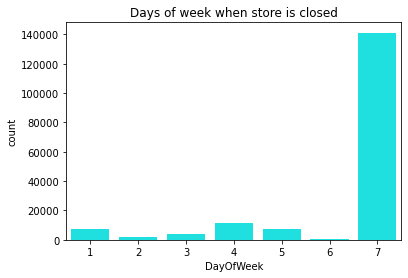

In [25]:
sns.countplot(data = df[df['Open']==0], x='DayOfWeek', color='cyan')
plt.title('Days of week when store is closed')
plt.savefig('Days of week when store is closed')

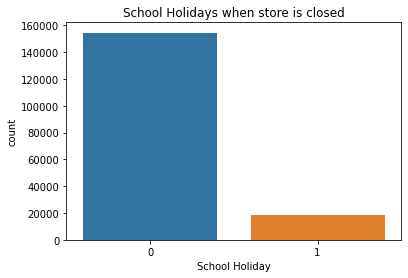

In [26]:
sns.countplot(data= df[df['Open']==0], x='SchoolHoliday'
             )
plt.title('School Holidays when store is closed')
plt.xlabel('School Holiday')
plt.xticks([0, 1])
plt.savefig('School Holidays when store is closed')

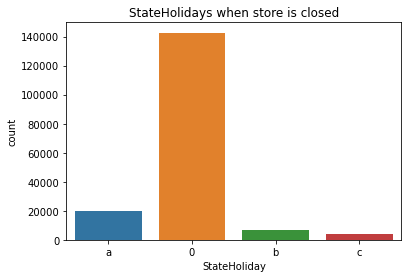

In [27]:
sns.countplot(data=df[df['Open']==0], x= 'StateHoliday')
plt.title('StateHolidays when store is closed')
plt.savefig('StateHolidays when store is closed')

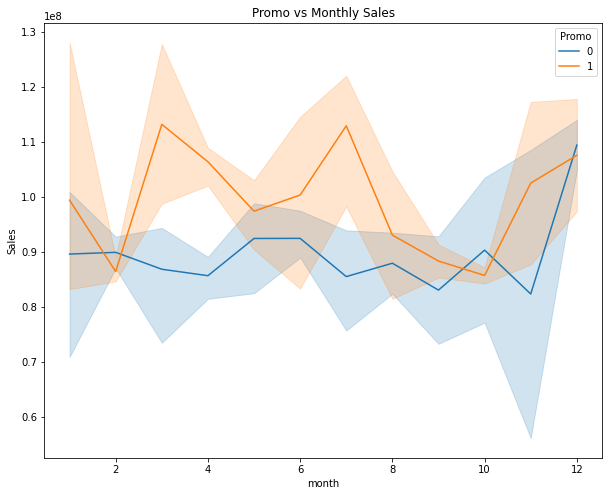

In [29]:
monthly_sales_by_promo = df.groupby([df.index.to_period('M'), 'Promo'])['Sales'].sum().reset_index()
monthly_sales_by_promo['month'] = monthly_sales_by_promo[df.index.name].dt.month
monthly_sales_by_promo['year'] = monthly_sales_by_promo[df.index.name].dt.year

# Plotting
plt.figure(figsize=(10,8))
sns.lineplot(data=monthly_sales_by_promo, x='month', y='Sales', hue='Promo')
plt.title('Promo vs Monthly Sales')
plt.savefig('Promo_vs_Monthly_Sales.png')
plt.show()

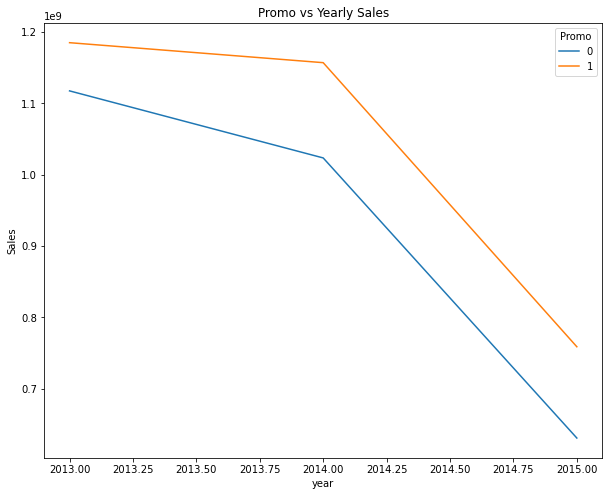

In [30]:
yearly_sales_by_promo = df.groupby([df.index.to_period('Y'), 'Promo'])['Sales'].sum().reset_index()
yearly_sales_by_promo['year'] = yearly_sales_by_promo[df.index.name].dt.year

# Plotting
plt.figure(figsize=(10, 8))
sns.lineplot(data=yearly_sales_by_promo, x='year', y='Sales', hue='Promo')
plt.title('Promo vs Yearly Sales')
plt.savefig('Promo_vs_yearly_Sales.png')
plt.show()

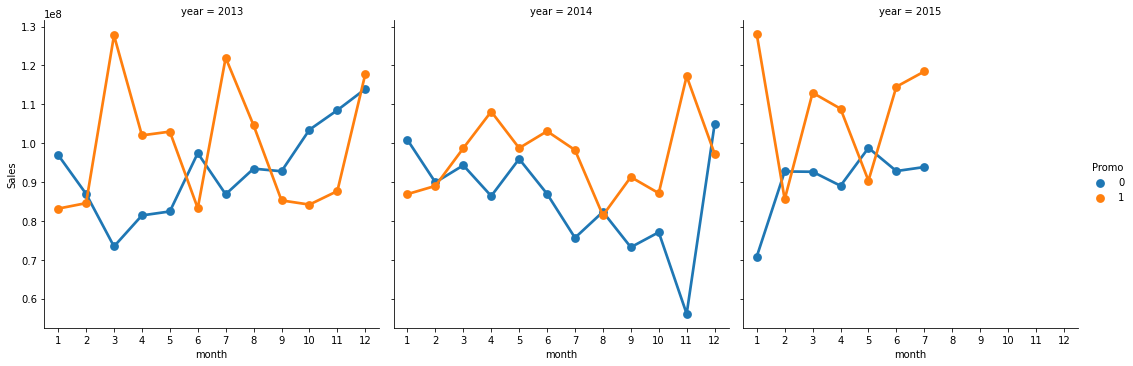

In [31]:
sales_by_promo = df.groupby([df.index.to_period('M'), 'Promo'])['Sales'].sum().reset_index()
sales_by_promo['month'] = sales_by_promo[df.index.name].dt.month
sales_by_promo['year'] = sales_by_promo[df.index.name].dt.year

sns.catplot(data = sales_by_promo, x='month', y='Sales', col ='year', hue='Promo', kind= 'point',linestyles='-', markers='o')
plt.savefig('Promo plots')

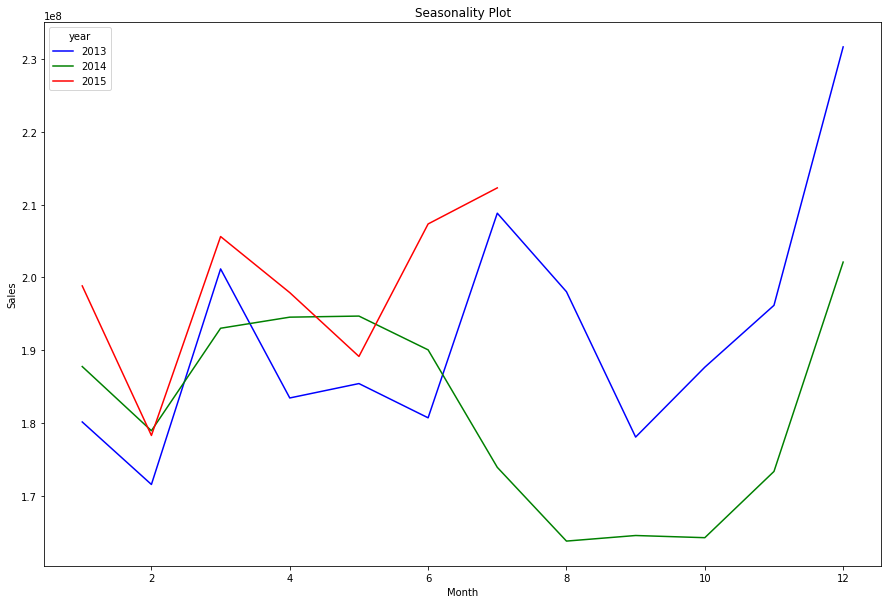

In [32]:
monthly_sales = df.resample('M').sum()
monthly_sales['month'] = monthly_sales.index.month
monthly_sales['year'] = monthly_sales.index.year
plt.figure(figsize=(15,10))
sns.lineplot(data= monthly_sales, x='month', y ='Sales', hue='year', palette = {2013: 'blue', 2014: 'green', 2015: 'red'},
            markers = 'o')
plt.title('Seasonality Plot')
plt.ylabel('Sales')
plt.xlabel('Month')
plt.savefig('Seasonality Plot')

In [6]:
df.reset_index(inplace=True)

# Store Data EDA

In [7]:
df_store = pd.read_csv('store.csv')

In [35]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [36]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [37]:
df_store.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [8]:
df_store['CompetitionDistance'].fillna(df_store['CompetitionDistance'].median(), inplace=True)

In [9]:
# Here Nan means 0 so replacing nan values with o
df_store.fillna(value = 0, inplace=True)

In [40]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [10]:
# Join the two dataframes

newdf = pd.merge(df, df_store, on = 'Store', how= 'inner')
newdf

,index,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,...,day,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,0,1,5,2015-07-31,5263,555,1,1,0,1,...,31,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1115,1,4,2015-07-30,5020,546,1,1,0,1,...,30,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,2230,1,3,2015-07-29,4782,523,1,1,0,1,...,29,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,3345,1,2,2015-07-28,5011,560,1,1,0,1,...,28,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,4460,1,1,2015-07-27,6102,612,1,1,0,1,...,27,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1012749,1115,6,2013-01-05,4771,339,1,0,0,1,...,5,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017205,1013864,1115,5,2013-01-04,4540,326,1,0,0,1,...,4,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017206,1014979,1115,4,2013-01-03,4297,300,1,0,0,1,...,3,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"
1017207,1016094,1115,3,2013-01-02,3697,305,1,0,0,1,...,2,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [42]:
newdf.shape

(1017209, 21)

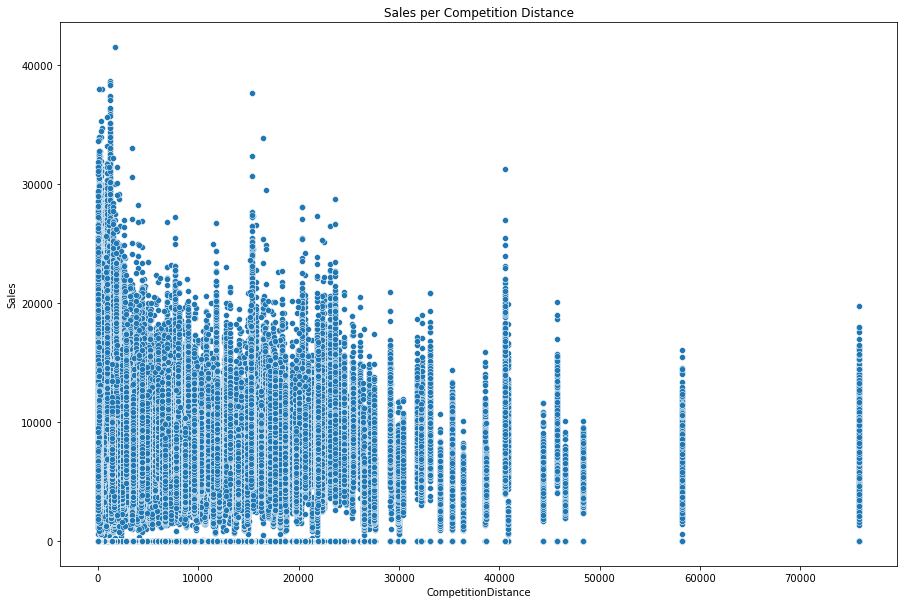

In [43]:
plt.figure(figsize=(15,10))
sns.scatterplot(data= newdf, x='CompetitionDistance', y='Sales')
plt.title('Sales per Competition Distance')
plt.savefig('Sales per Competition Distance')

In [44]:
newdf.groupby(by='StoreType')['Sales', 'Customers'].sum().sort_values('Sales', ascending = False)

,Sales,Customers
StoreType,,
a,3165334859,363541434
d,1765392943,156904995
c,783221426,92129705
b,159231395,31465621


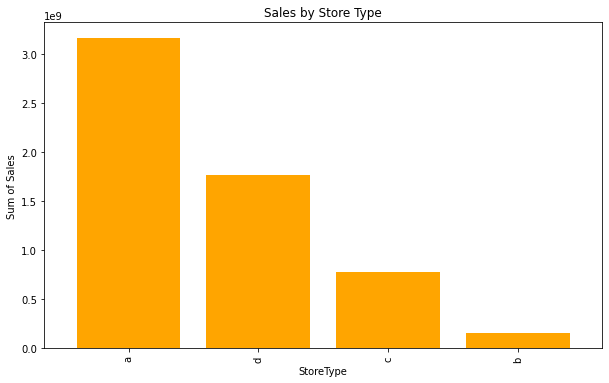

In [45]:
newdf.groupby(by='StoreType')['Sales'].sum().sort_values(ascending = False).plot(kind= 'bar', width=0.8, 
                                                                                  color = 'orange',
                                                                                  figsize=(10, 6))
plt.title('Sales by Store Type')
plt.ylabel('Sum of Sales')
plt.savefig('Sales by Store Type')
plt.show()

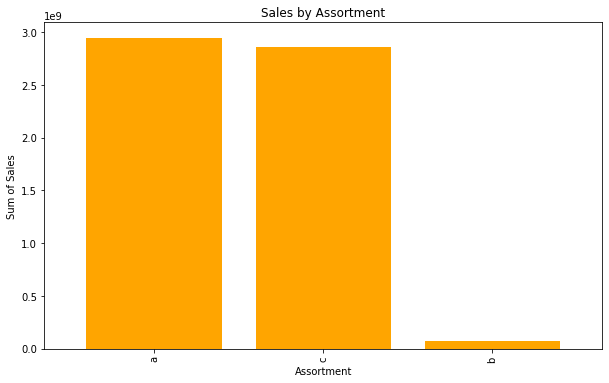

In [46]:
newdf.groupby(by='Assortment')['Sales'].sum().sort_values(ascending = False).plot(kind= 'bar', width=0.8, 
                                                                                  color = 'orange',
                                                                                  figsize=(10, 6))
plt.title('Sales by Assortment')
plt.ylabel('Sum of Sales')
plt.savefig('Sales by Assortment.png')
plt.show()

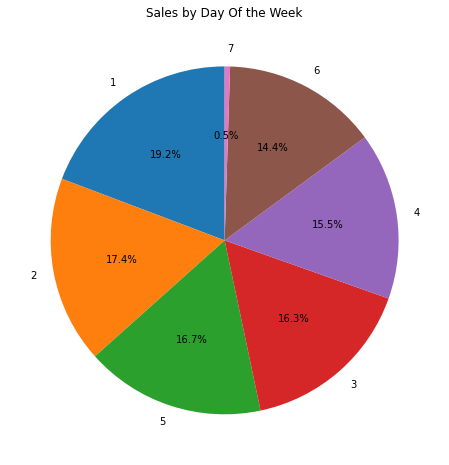

In [47]:
dowgp = newdf.groupby(by='DayOfWeek')['Sales', 'Customers'].sum().sort_values('Sales', ascending = False)
plt.figure(figsize=(12,8))
plt.pie(dowgp['Sales'], labels=dowgp.index, autopct='%1.1f%%', startangle=90)
plt.title('Sales by Day Of the Week')
plt.savefig('Sales by Day Of the Week')

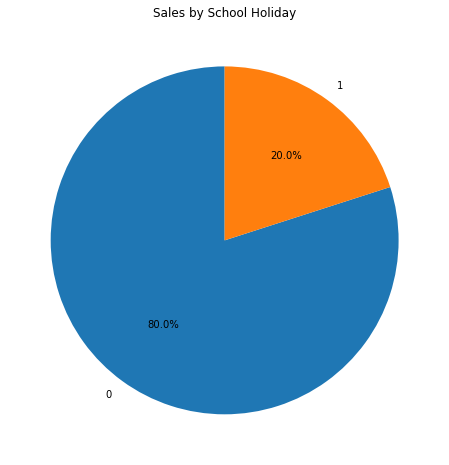

In [48]:
gp = newdf.groupby(by='SchoolHoliday')['Sales',  'Customers'].sum().sort_values('Sales', ascending = False)
plt.figure(figsize=(12,8))
plt.pie(gp['Sales'], labels=gp.index, autopct='%1.1f%%', startangle=90)
plt.title('Sales by School Holiday')
plt.savefig('Sales by School Holiday')

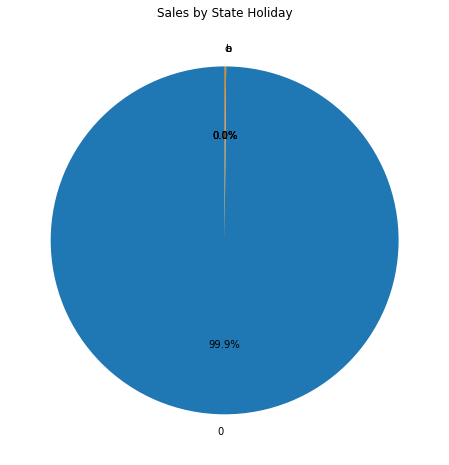

In [49]:
gp1 = newdf.groupby(by='StateHoliday')['Sales',  'Customers'].sum().sort_values('Sales', ascending = False)
plt.figure(figsize=(12,8))
plt.pie(gp1['Sales'], labels=gp1.index, autopct='%1.1f%%', startangle=90)
plt.title('Sales by State Holiday')
plt.savefig('Sales by State Holiday')

In [13]:
# when store was neither closed nor had 0 sales
newdf_Open = newdf.loc[~((newdf['Open']==0) | (newdf['Sales']==0))]

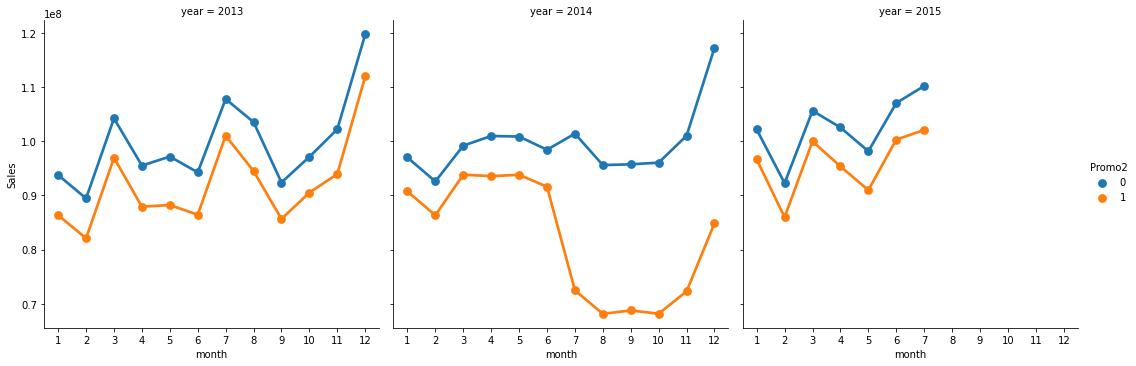

In [51]:
sorted_df= newdf.set_index('Date')
sales_by_promo2 = sorted_df.groupby([sorted_df.index.to_period('M'), 'Promo2'])['Sales'].sum().reset_index()
sales_by_promo2['month'] = sales_by_promo2[sorted_df.index.name].dt.month
sales_by_promo2['year'] = sales_by_promo2[sorted_df.index.name].dt.year

sns.catplot(data = sales_by_promo2, x='month', y='Sales', col ='year', hue='Promo2', kind= 'point',linestyles='-', markers='o')
plt.savefig('Promo2 plots')

In [52]:
newdf.tail()

,Date,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,year,...,day,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1017204,2015-07-27,988,1,6011,812,1,1,0,1,2015,...,27,a,a,30.0,11.0,2012.0,0,0.0,0.0,0
1017205,2015-07-28,988,2,4592,705,1,1,0,1,2015,...,28,a,a,30.0,11.0,2012.0,0,0.0,0.0,0
1017206,2015-07-29,988,3,4522,689,1,1,0,1,2015,...,29,a,a,30.0,11.0,2012.0,0,0.0,0.0,0
1017207,2015-07-30,988,4,4591,673,1,1,0,1,2015,...,30,a,a,30.0,11.0,2012.0,0,0.0,0.0,0
1017208,2015-07-31,988,5,5494,724,1,1,0,1,2015,...,31,a,a,30.0,11.0,2012.0,0,0.0,0.0,0


In [53]:
newdf['Promo2SinceWeek'].unique()

array([22.,  0., 18., 37., 45., 31., 10.,  5., 14., 40.,  1., 39., 13.,
       36., 27.,  9., 35., 48., 50., 23., 44.,  6., 26., 49., 28.])

In [11]:
# Converting weeks into months
def weekstomonth(no_of_weeks):
    mon = (no_of_weeks* 7 )/ 30
    mon = round(mon)
    return mon

newdf['Promo2SinceMonth'] = newdf['Promo2SinceWeek'].apply(weekstomonth)

In [12]:
newdf['CompetitionOpenSinceMonth'] = newdf['CompetitionOpenSinceMonth'].astype(int)
newdf['CompetitionOpenSinceYear'] = newdf['CompetitionOpenSinceYear'].astype(int)
newdf['Promo2SinceYear'] = newdf['Promo2SinceYear'].astype(int)

In [13]:
# Creating new columns
newdf['CompetitionOpenSinceMonthYear'] = pd.to_datetime(newdf['CompetitionOpenSinceMonth'].astype(str) + '-' + 
                                                        newdf['CompetitionOpenSinceYear'].astype(str), format =  '%m-%Y',
                                                       errors = 'coerce')

newdf['Promo2SinceMonthYear'] = pd.to_datetime(newdf['Promo2SinceMonth'].astype(str) + '-' + 
                                                        newdf['Promo2SinceYear'].astype(str), format =  '%m-%Y',
                                              errors = 'coerce')

newdf['Month_Year'] = pd.to_datetime(newdf['month'].astype(str)+'-'+newdf['year'].astype(str), format = '%m-%Y',
                                    errors = 'coerce')

newdf['Competition_open_total_days'] = newdf['Month_Year'] - newdf['CompetitionOpenSinceMonthYear']
newdf['Promo_open_total_days'] = newdf['Month_Year'] - newdf['Promo2SinceMonthYear']

In [14]:
newdf['Competition_open_total_days'].fillna(pd.Timedelta('0 days'), inplace=True)
newdf['Promo_open_total_days'].fillna(pd.Timedelta('0 days'), inplace=True)

In [15]:
newdf['Competition_open_total_days'] = newdf['Competition_open_total_days'].dt.days
newdf['Promo_open_total_days'] = newdf['Promo_open_total_days'].dt.days

In [16]:
# Dropping unessessary columns

newdf.drop([ 'Date', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear',
            'Promo2SinceMonth', 'CompetitionOpenSinceMonthYear',  'Promo2SinceMonthYear', 'Month_Year' ],
          axis=1, inplace= True)



In [19]:
newdf.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'year', 'month', 'day', 'StoreType',
       'Assortment', 'CompetitionDistance', 'Promo2', 'PromoInterval',
       'Competition_open_total_days', 'Promo_open_total_days'],
      dtype='object')

## Correlation Analysis

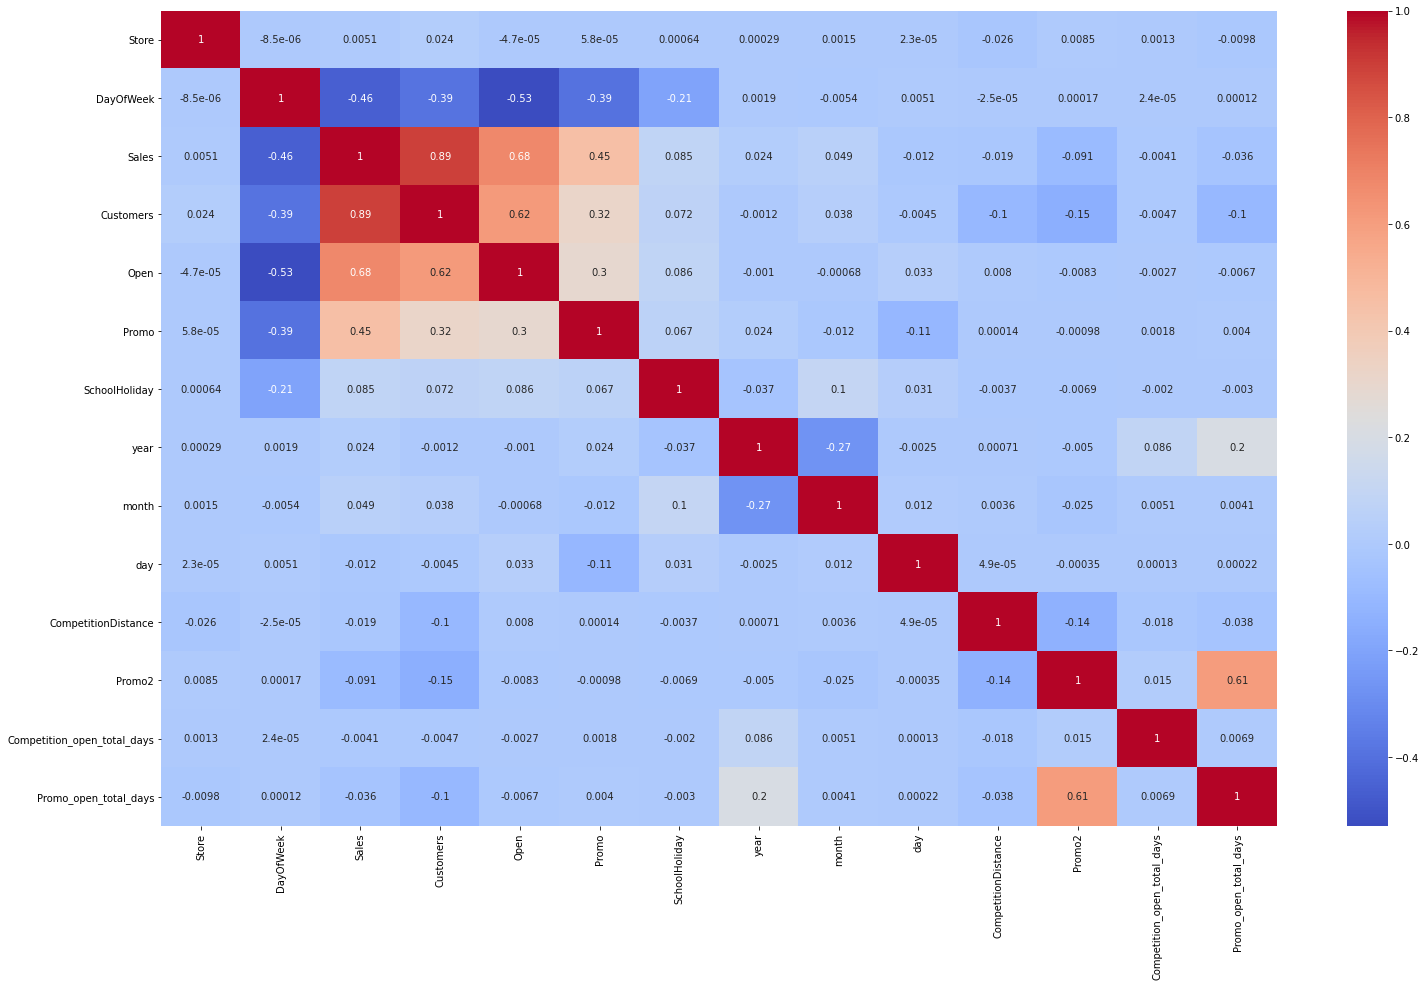

In [21]:
plt.figure(figsize=(25,15))
sns.heatmap(newdf.corr(), annot=True, cmap='coolwarm')
plt.savefig('Correlation')

# Feature encoding

In [17]:
newdf['StateHoliday'].replace({'a':1, 'b': 1, 'c': 1}, inplace= True)
newdf['StateHoliday'] = newdf['StateHoliday'].astype(int)

In [18]:
final_df = pd.get_dummies(newdf,columns = ['StoreType', 'Assortment', 'PromoInterval', ], drop_first=False )


In [24]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 26 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   Store                           1017209 non-null  int64  
 1   DayOfWeek                       1017209 non-null  int64  
 2   Sales                           1017209 non-null  int64  
 3   Customers                       1017209 non-null  int64  
 4   Open                            1017209 non-null  int64  
 5   Promo                           1017209 non-null  int64  
 6   StateHoliday                    1017209 non-null  int32  
 7   SchoolHoliday                   1017209 non-null  int64  
 8   year                            1017209 non-null  int64  
 9   month                           1017209 non-null  int64  
 10  day                             1017209 non-null  int64  
 11  CompetitionDistance             1017209 non-null  float64
 12  

## Train-Test Split

In [19]:
train_data = final_df[final_df.year <= 2014]
val_data = final_df[final_df.year == 2015]

In [20]:
print(train_data.shape)
print(val_data.shape)

(780829, 27)
(236380, 27)


In [21]:
train_inputs = train_data.drop(['Sales', 'Customers'], axis=1)  # Removing SALES and CUSTOMERS columns
train_target = train_data['Sales']

val_inputs = val_data.drop(['Sales', 'Customers'], axis=1)   # Removing SALES and CUSTOMERS columns
val_target = val_data['Sales']

#### Making a sample Train dataset for faster computation

In [22]:
sample_train_inputs =  train_inputs.iloc[:780829:100, :]
sample_train_target = train_target.iloc[:780829:100]

## Decision Tree 

#### First finding Best parameters using Sample dataset

In [23]:
# GridsearchCV on sample data

from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeRegressor
decisiontree = DecisionTreeRegressor(random_state= 1 )


parameters = {
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'auto', 'sqrt', 'log2']
}

gridcv_dc = GridSearchCV(estimator=decisiontree, param_grid= parameters, scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)
gridcv_dc.fit(sample_train_inputs, sample_train_target)

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error', 'poisson'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'max_features': [None, 'auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 10, 20],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=1)

In [24]:
gridcv_dc.best_params_

{'criterion': 'squared_error',
 'max_depth': 10,
 'max_features': None,
 'min_samples_leaf': 5,
 'min_samples_split': 20,
 'splitter': 'random'}

In [25]:
best_dt = gridcv_dc.best_estimator_

from sklearn.metrics import mean_squared_error, r2_score

train_target_predict_best_dt = best_dt.predict(train_inputs)
val_target_predict_best_dt = best_dt.predict(val_inputs)

train_RMSE_score_best_dt = np.sqrt(mean_squared_error(train_target, train_target_predict_best_dt))
test_RMSE_score_best_dt = np.sqrt(mean_squared_error(val_target, val_target_predict_best_dt))

train_R2_score_best_dt = r2_score(train_target, train_target_predict_best_dt)
test_R2_score_best_dt = r2_score(val_target, val_target_predict_best_dt)

print(f'Training RMSE Score for Decision Tree: {train_RMSE_score_best_dt}')
print(f'Testing RMSE Score for Decision Tree: {test_RMSE_score_best_dt}', '\n')

print(f'Training R2 Score for Decision Tree: {train_R2_score_best_dt}')
print(f'Testing R2 Score for Decision Tree: {test_R2_score_best_dt}')

Training RMSE Score for Decision Tree: 2484.5259298856813
Testing RMSE Score for Decision Tree: 2544.744333103622 

Training R2 Score for Decision Tree: 0.5840463330847665
Testing R2 Score for Decision Tree: 0.5608800902023479


In [164]:
from sklearn.tree import DecisionTreeRegressor
decisiontree = DecisionTreeRegressor(random_state= 1, criterion = 'squared_error',max_depth =10, max_features=  None,
                                    min_samples_leaf = 10, min_samples_split = 2, splitter= 'random' )
dc = decisiontree.fit(train_inputs, train_target)


train_target_predict_dc = dc.predict(train_inputs)
val_target_predict_dc = dc.predict(val_inputs)

In [165]:
train_RMSE_score_dc = np.sqrt(mean_squared_error(train_target, train_target_predict_dc))
test_RMSE_score_dc = np.sqrt(mean_squared_error(val_target, val_target_predict_dc))

train_R2_score_dc = r2_score(train_target, train_target_predict_dc)
test_R2_score_dc = r2_score(val_target, val_target_predict_dc)

print(f'Training RMSE Score for Decision Tree: {train_RMSE_score_dc}')
print(f'Testing RMSE Score for Decision Tree: {test_RMSE_score_dc}', '\n')

print(f'Training R2 Score for Decision Tree: {train_R2_score_dc}')
print(f'Testing R2 Score for Decision Tree: {test_R2_score_dc}')

Training RMSE Score for Decision Tree: 2329.4506869832
Testing RMSE Score for Decision Tree: 2309.2759668686913 

Training R2 Score for Decision Tree: 0.6343505434852361
Testing R2 Score for Decision Tree: 0.6383849572356577


In [166]:
pd.DataFrame({'features' : train_inputs.columns, 'importance': dc.feature_importances_}).sort_values('importance', ascending=False)

,features,importance
2,Open,0.715623
3,Promo,0.115733
1,DayOfWeek,0.033587
9,CompetitionDistance,0.024295
14,StoreType_b,0.019612
7,month,0.018803
19,Assortment_c,0.014067
20,PromoInterval_0,0.011118
0,Store,0.009593
8,day,0.005011


# Random Forest

#### First finding Best parameters using Sample dataset

In [134]:
# GridSearchCV on sample data

from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()

params = {
    'n_estimators': [150, 200],                
    'max_depth': [10, 15, 20],                 
    'min_samples_split': [2, 5, 10],                                               
    'max_features': ['auto', 'sqrt', 'log2'],                                                
}

gridcv_rf = GridSearchCV(estimator = RF, param_grid = params, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
gridcv_rf.fit(sample_train_inputs, sample_train_target)


Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [150, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [135]:
best_rf = gridcv_rf.best_estimator_
best_rf

RandomForestRegressor(max_depth=15, max_features='sqrt', min_samples_split=10,
                      n_estimators=150)

In [136]:
gridcv_rf.best_params_

{'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_split': 10,
 'n_estimators': 150}

In [137]:
gridcv_rf.best_score_

-6274963.798669793

In [143]:
train_target_predict_best_rf = best_rf.predict(train_inputs)
val_target_predict_best_rf = best_rf.predict(val_inputs)

train_RMSE_score_best_rf = np.sqrt(mean_squared_error(train_target, train_target_predict_best_rf))
test_RMSE_score_best_rf = np.sqrt(mean_squared_error(val_target, val_target_predict_best_rf))

train_R2_score_best_rf = r2_score(train_target, train_target_predict_best_rf)
test_R2_score_best_rf = r2_score(val_target, val_target_predict_best_rf)

print(f'Training RMSE Score for Random Forest: {train_RMSE_score_best_rf}')
print(f'Testing RMSE Score for Random Forest: {test_RMSE_score_best_rf}', '\n')

print(f'Training R2 Score for Random Forest: {train_R2_score_best_rf}')
print(f'Testing R2 Score for Random Forest: {test_R2_score_best_rf}')

Training RMSE Score for Random Forest: 2179.203278497635
Testing RMSE Score for Random Forest: 2175.9784162783258 

Training R2 Score for Random Forest: 0.6799974956169972
Testing R2 Score for Random Forest: 0.6789268541596281


##### Now Implementing the same Parameters to train the model on the whole dataset for better score

In [149]:

randomforest = RandomForestRegressor(random_state= 1,n_estimators= 200, criterion = 'squared_error', max_depth=15, 
                                     max_features= 'sqrt', min_samples_leaf = 10, min_samples_split =10)
rf = randomforest.fit(train_inputs, train_target)


train_target_predict_rf = rf.predict(train_inputs)
val_target_predict_rf = rf.predict(val_inputs)

In [151]:
train_RMSE_score_rf = np.sqrt(mean_squared_error(train_target, train_target_predict_rf))
test_RMSE_score_rf = np.sqrt(mean_squared_error(val_target, val_target_predict_rf))

train_R2_score_rf = r2_score(train_target, train_target_predict_rf)
test_R2_score_rf = r2_score(val_target, val_target_predict_rf)

print(f'Training RMSE Score for Random Forest: {train_RMSE_score_rf}')
print(f'Testing RMSE Score for Random Forest: {test_RMSE_score_rf}', '\n')

print(f'Training R2 Score for Random Forest: {train_R2_score_rf}')
print(f'Testing R2 Score for Random Forest: {test_R2_score_rf}')

Training RMSE Score for Random Forest: 1841.0350227782062
Testing RMSE Score for Random Forest: 1959.7628450252548 

Training R2 Score for Random Forest: 0.7716074199026709
Testing R2 Score for Random Forest: 0.7395634965068717


In [167]:
pd.DataFrame({'features' : train_inputs.columns, 'importance': rf.feature_importances_}).sort_values('importance', ascending=False)

,features,importance
2,Open,0.351024
1,DayOfWeek,0.215577
3,Promo,0.146397
9,CompetitionDistance,0.058537
0,Store,0.042883
4,StateHoliday,0.042151
11,Competition_open_total_days,0.022423
14,StoreType_b,0.019710
7,month,0.019495
8,day,0.016655


# XGBoost


#### First finding Best parameters using Sample dataset

In [154]:
# GridsearchCV on sample data

from xgboost import XGBRegressor
xgb = XGBRegressor(random_state=1)

param_xgb = {
    'n_estimators': [100, 150],
    'max_depth': [10, 15, 20],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
}

grid_xgb = GridSearchCV(estimator = xgb, param_grid = param_xgb, scoring = 'neg_mean_squared_error', cv= 5, verbose = 1,
                       n_jobs= -1)

grid_xgb.fit(sample_train_inputs, sample_train_target)


Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=1,
                                    reg_alpha=None, reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [10, 15, 20],
                         'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 150]},
             scoring='neg_mean_squared_error', verbose=1)

In [155]:
grid_xgb.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=15, max_leaves=0, min_child_weight=3,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=1, reg_alpha=0,
             reg_lambda=1, ...)

In [157]:
grid_xgb.best_params_

{'learning_rate': 0.05,
 'max_depth': 15,
 'min_child_weight': 3,
 'n_estimators': 100}

#### Now Implementing the same Parameters to train the model on the whole dataset for better score


In [25]:
from xgboost import XGBRegressor
xgb = XGBRegressor(random_state=1, objective = 'reg:linear', learning_rate = 0.05, max_depth = 15, 
                   n_estimators =100, min_child_weight = 3)
xgb.fit(train_inputs, train_target)


train_target_predict_xgb = xgb.predict(train_inputs)
val_target_predict_xgb = xgb.predict(val_inputs)

[12:37:15] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [28]:
train_RMSE_score_xgb = np.sqrt(mean_squared_error(train_target, train_target_predict_xgb))
test_RMSE_score_xgb = np.sqrt(mean_squared_error(val_target, val_target_predict_xgb))

train_R2_score_xgb = r2_score(train_target, train_target_predict_xgb)
test_R2_score_xgb = r2_score(val_target, val_target_predict_xgb)

print(f'Training RMSE Score for xgb: {train_RMSE_score_xgb}')
print(f'Testing RMSE Score for xgb: {test_RMSE_score_xgb}', '\n')

print(f'Training R2 Score for xgb: {train_R2_score_xgb}')
print(f'Testing R2 Score for xgb: {test_R2_score_xgb}')

Training RMSE Score for xgb: 925.9349543902041
Testing RMSE Score for xgb: 1414.83426782277 

Training R2 Score for xgb: 0.9422278076771199
Testing R2 Score for xgb: 0.8642605901022797


In [121]:
pd.DataFrame({'features' : train_inputs.columns, 'importance': xgb.feature_importances_}).sort_values('importance', ascending=False)

,features,importance
2,Open,0.992306
3,Promo,0.003005
14,StoreType_b,0.001666
10,Promo2,0.000390
17,Assortment_a,0.000318
9,CompetitionDistance,0.000262
13,StoreType_a,0.000255
23,"PromoInterval_Mar,Jun,Sept,Dec",0.000216
0,Store,0.000200
15,StoreType_c,0.000197


# Predicting future sales for the day 2015-08-01 

In [79]:
#Saving the model

import joblib

joblib.dump(xgb, 'xgb.joblib')

In [80]:
# Loading the model

xgb_model = joblib.load('xgb.joblib')

In [90]:
# Importing future dataset to predict sales

future_data = pd.read_excel('future_data.xlsx')

future_data.head()

,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,year,month,day,CompetitionDistance,...,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec"
0,1,6,1,1,0,0,2015,8,1,1270.0,...,0.0,1.0,0,1,0.0,0,1,0,0,0
1,2,6,1,1,0,0,2015,8,1,570.0,...,0.0,0.0,0,1,0.0,0,0,0,1,0
2,3,6,1,1,0,0,2015,8,1,14130.0,...,0.0,0.0,0,1,0.0,0,0,0,1,0
3,4,6,1,1,0,0,2015,8,1,620.0,...,0.0,NaN,0,0,0.0,1,1,0,0,0
4,5,6,1,1,0,0,2015,8,1,29910.0,...,0.0,0.0,0,1,0.0,0,1,0,0,0


In [92]:
# Predicting sales for 2015-08-01 date

predictions = xgb_model.predict(future_data)
future_data['Sales'] = predictions

In [97]:
future_data['Sales'] = future_data['Sales'].apply(lambda x: int(x))

In [98]:
future_data['Sales'].to_list()

[6247,
 5948,
 8041,
 9367,
 5813,
 6986,
 8951,
 6904,
 7526,
 6475,
 8158,
 8146,
 6215,
 6666,
 7539,
 8135,
 7610,
 6917,
 7347,
 7098,
 6665,
 6623,
 6463,
 9227,
 10882,
 7473,
 9689,
 6557,
 8171,
 6684,
 7915,
 6085,
 8649,
 7780,
 8875,
 8674,
 7745,
 6623,
 5486,
 5954,
 6971,
 9379,
 7071,
 6836,
 6520,
 6022,
 8642,
 5298,
 7640,
 5774,
 7532,
 8139,
 7044,
 7977,
 5218,
 7731,
 10794,
 7745,
 6985,
 7742,
 5593,
 7044,
 7542,
 10177,
 6554,
 6665,
 8764,
 8052,
 8587,
 7661,
 9908,
 6546,
 6548,
 7245,
 7696,
 9006,
 7430,
 5781,
 6781,
 7696,
 6771,
 9921,
 5633,
 10999,
 7794,
 6064,
 6802,
 7240,
 6078,
 9291,
 6287,
 6236,
 7021,
 8234,
 8285,
 6098,
 8120,
 5572,
 5666,
 8414,
 7391,
 7985,
 8645,
 9788,
 7871,
 8204,
 7744,
 8910,
 7763,
 6967,
 7540,
 6837,
 8922,
 5937,
 6960,
 8085,
 6298,
 8001,
 7673,
 6900,
 6438,
 8888,
 8691,
 6451,
 11521,
 7186,
 5975,
 7505,
 7560,
 6103,
 6709,
 6597,
 7878,
 6639,
 6733,
 6453,
 7793,
 8059,
 7102,
 7625,
 6215,
 6275,
 

In [101]:
future_data.head()

,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,year,month,day,CompetitionDistance,...,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c,PromoInterval_0,"PromoInterval_Feb,May,Aug,Nov","PromoInterval_Jan,Apr,Jul,Oct","PromoInterval_Mar,Jun,Sept,Dec",Sales
0,1,6,1,1,0,0,2015,8,1,1270.0,...,1.0,0,1,0.0,0,1,0,0,0,6247
1,2,6,1,1,0,0,2015,8,1,570.0,...,0.0,0,1,0.0,0,0,0,1,0,5948
2,3,6,1,1,0,0,2015,8,1,14130.0,...,0.0,0,1,0.0,0,0,0,1,0,8041
3,4,6,1,1,0,0,2015,8,1,620.0,...,NaN,0,0,0.0,1,1,0,0,0,9367
4,5,6,1,1,0,0,2015,8,1,29910.0,...,0.0,0,1,0.0,0,1,0,0,0,5813


In [103]:
future_data[['Store', 'Sales']]

,Store,Sales
0,1,6247
1,2,5948
2,3,8041
3,4,9367
4,5,5813
...,...,...
1110,1111,6079
1111,1112,11494
1112,1113,8089
1113,1114,21672


In [106]:
# Saving the predicted data to excel sheet
predicted_sales = future_data[['Store', 'Sales']]
predicted_sales.to_excel('Predicted_Sales.xlsx')

In [1]:
st = 'i am a learnbays student'


In [3]:
n = 0
for i in st:
    word = ''
    if i != ' ':
        word += i
        
    
    else:
        
        

24